# PCA - Code

In diesem Notebook schauen wir uns das `PCA` Modell am MNIST Datensatz an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

## Datensatz - MNIST

MNIST Daten sind Schwarz-Weiss Bilder von den Zahlen von 0 bis 9.

In [10]:
data = load_digits()  # Load MNIST data set
X_data, y_data = data.images, data.target

X_data = X_data.reshape(X_data.shape[0], -1)

In [11]:
def plot_images(data, orig_data=None, nrows=18, ncols=18):
    """
    Plot images with or without original data.
    :param data: Data to plot
    :param orig_data: Original data to plot next to data.
    :param nrows: number of rows
    :param ncols: number of columns
    """
    data = data.reshape(data.shape[0], 8, 8)
    if orig_data is not None:
        orig_data = orig_data.reshape(data.shape[0], 8, 8)
        data = np.array(list(zip(orig_data, data)))
        data = data.reshape(-1, 8, 8)
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for ax, image in zip(axes.flatten(), data):
        ax.set_axis_off()
        ax.imshow(image, cmap='gray')

MNIST examples from dataset


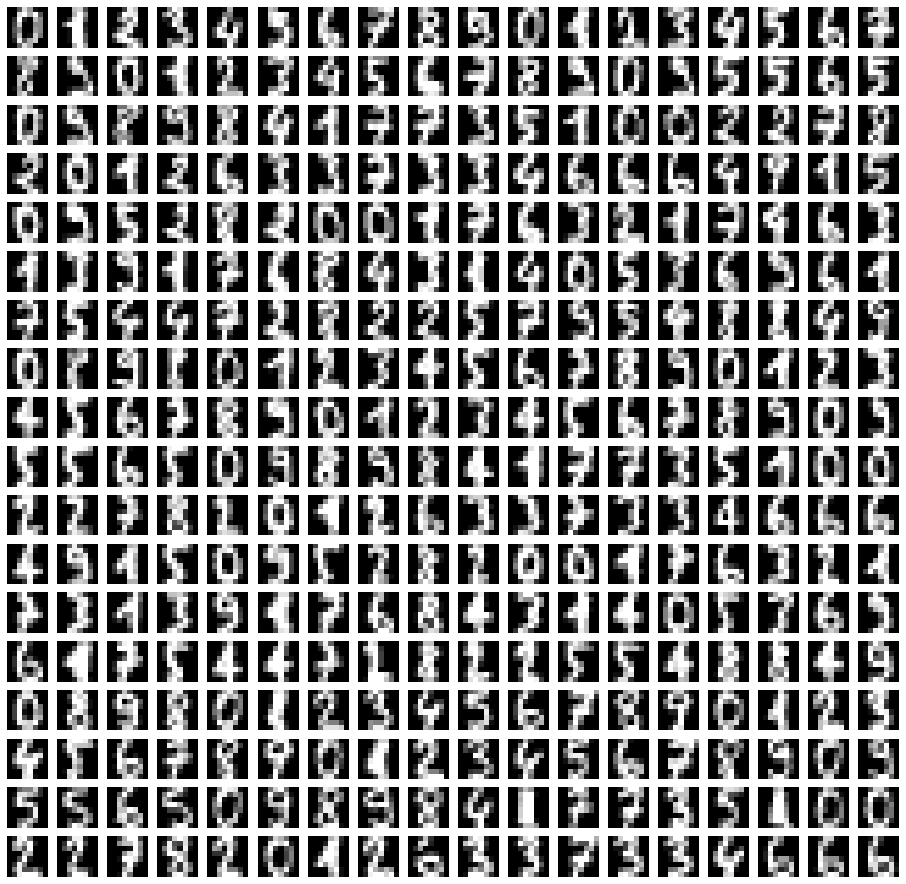

In [12]:
print("MNIST examples from dataset")
plot_images(X_data)
plt.show()

## PCA für Dimensionality Reduction

Wir schauen hier verschiedene Werte für den Hyperparameter `n_components` an, um ein Gefühl dafür zu entwickeln.

### `n_components=0.9`

`n_components=0.9` behält 90% der Informationen (Streuung in den Daten).

* X_data: `1797 Bilder` mit jeweils `8*8 = 64 Pixel`
* X_data_encoded: `1797 encodede Bilder` (im Latent Space) mit jeweils `31 (gelernten) Features`.
* X_data_reconstructed: `1797 rekonstruierte Bilder` mit jeweils `8*8 = 64 Pixel`, die Rekonstruktion ist von den `31 Features` pro Bild aus X_data_encoded.

MNIST encoded and reconstructed with PCA(0.9)
X_data.shape=(1797, 64)
X_data_encoded.shape=(1797, 31)
X_data_reconstructed.shape=(1797, 64)


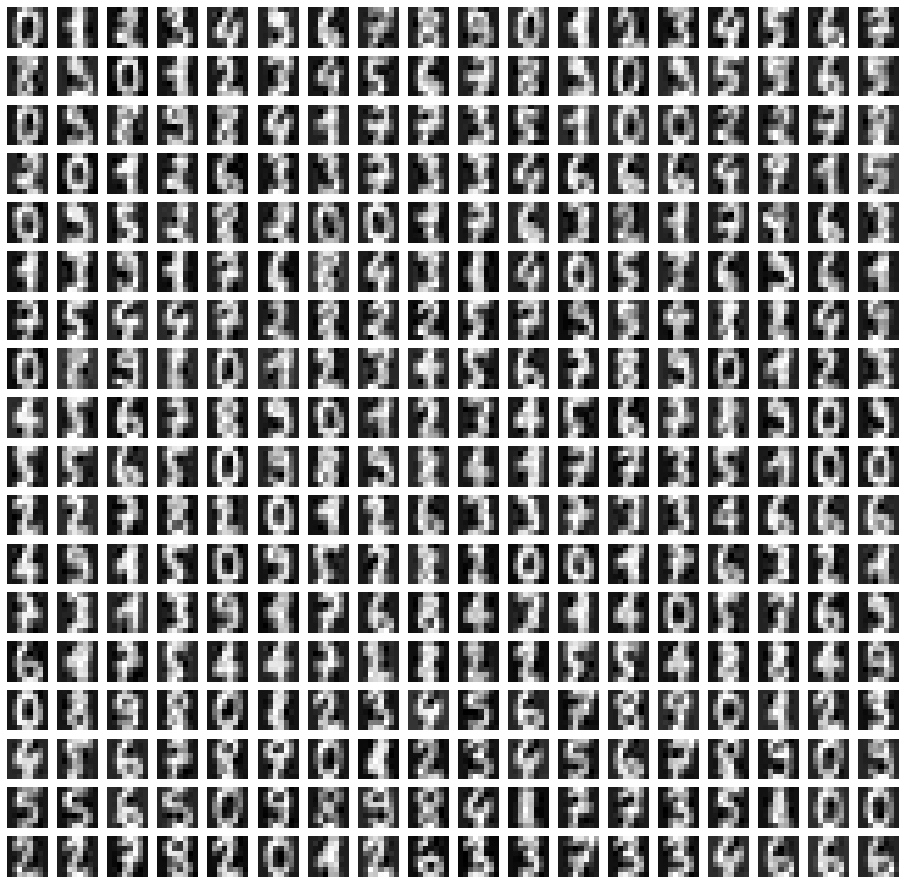

CPU times: user 16.1 s, sys: 953 ms, total: 17 s
Wall time: 16.1 s


In [13]:
%%time

n_components = 0.9  # 90%
model = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
])
model.fit(X_data)
X_data_encoded = model.transform(X_data)
X_data_reconstructed = model.inverse_transform(X_data_encoded)
# Durch die Transformation hat sich der Type von int zu float geändert, darum müssen wir hier noch zu int casten.
# X_data_reconstructed = np.clip(
#     X_data_reconstructed, 0, 255
# )

print(f"MNIST encoded and reconstructed with PCA({n_components})")
print(f"{X_data.shape=}")
print(f"{X_data_encoded.shape=}")
print(f"{X_data_reconstructed.shape=}")
plot_images(X_data_reconstructed)
plt.show()

### `n_components=0.5`

`n_components=0.5` behält 50% der Informationen (Streuung in den Daten).

* X_data: `1797 Bilder` mit jeweils `8*8 = 64 Pixel`
* X_data_encoded: `1797 encodede Bilder` (im Latent Space) mit jeweils `5 (gelernten) Features`.
* X_data_reconstructed: `1797 rekonstruierte Bilder` mit jeweils `8*8 = 64 Pixel`, die Rekonstruktion ist von den `5 Features` pro Bild aus X_data_encoded.

MNIST encoded and reconstructed with PCA(0.5)
X_data.shape=(1797, 64)
X_data_encoded.shape=(1797, 5)
X_data_reconstructed.shape=(1797, 64)


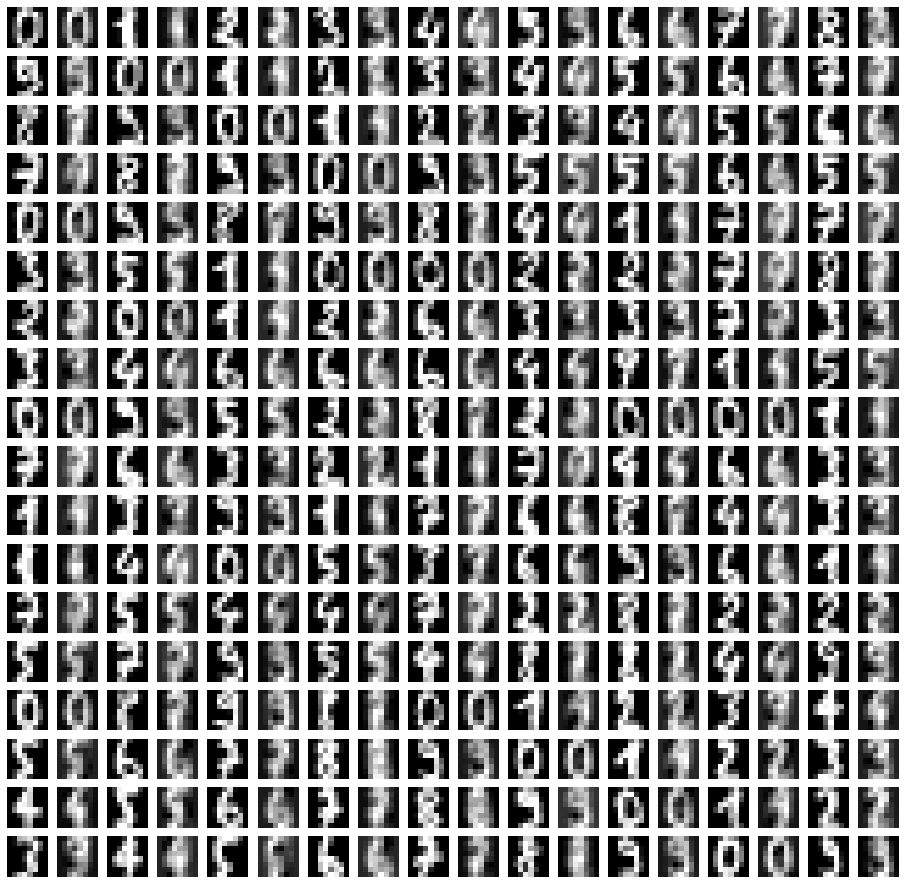

CPU times: user 13.2 s, sys: 854 ms, total: 14 s
Wall time: 13.2 s


In [14]:
%%time

n_components = 0.5  # 50%
pca = PCA(n_components=n_components)
pca.fit(X_data)
X_data_encoded = pca.transform(X_data)
X_data_reconstructed = pca.inverse_transform(X_data_encoded)

print(f"MNIST encoded and reconstructed with PCA({n_components})")
print(f"{X_data.shape=}")
print(f"{X_data_encoded.shape=}")
print(f"{X_data_reconstructed.shape=}")
plot_images(X_data_reconstructed, orig_data=X_data)
plt.show()

### `n_components=0.2`

`n_components=0.2` behält 50% der Informationen (Streuung in den Daten).

* X_data: `1797 Bilder` mit jeweils `8*8 = 64 Pixel`
* X_data_encoded: `1797 encodede Bilder` (im Latent Space) mit jeweils `2 (gelernten) Features`.
* X_data_reconstructed: `1797 rekonstruierte Bilder` mit jeweils `8*8 = 64 Pixel`, die Rekonstruktion ist von den `2 Features` pro Bild aus X_data_encoded.

MNIST encoded and reconstructed with PCA(0.2)
X_data.shape=(1797, 64)
X_data_encoded.shape=(1797, 2)
X_data_reconstructed.shape=(1797, 64)


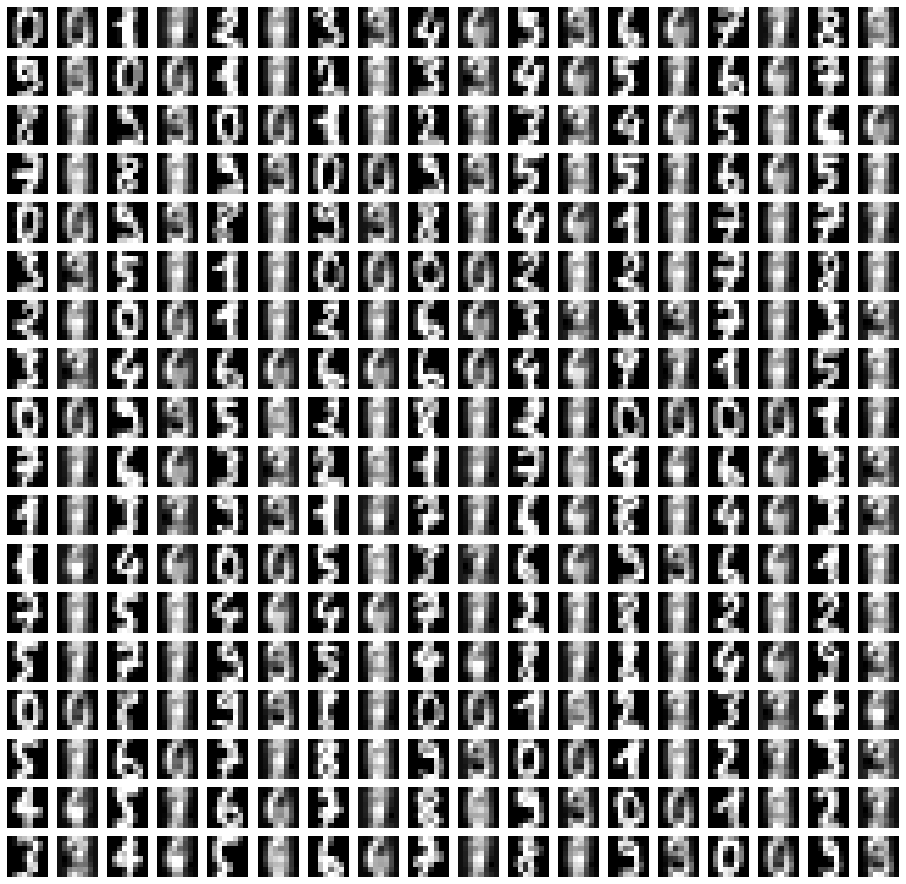

CPU times: user 13.5 s, sys: 590 ms, total: 14.1 s
Wall time: 13.9 s


In [15]:
%%time

n_components = 0.2  # 20%
pca = PCA(n_components=n_components)
pca.fit(X_data)
X_data_encoded = pca.transform(X_data)
X_data_reconstructed = pca.inverse_transform(X_data_encoded)

print(f"MNIST encoded and reconstructed with PCA({n_components})")
print(f"{X_data.shape=}")
print(f"{X_data_encoded.shape=}")
print(f"{X_data_reconstructed.shape=}")
plot_images(X_data_reconstructed, orig_data=X_data)
plt.show()

## PCA als Feature Preprocessing

PCA kann als Feature Preprocessing verwendet werden.
Bemerkung: Hier aus praktischen Gründen eigentlich nicht notwendig (Keine Geschwindigkeitsverbesserung dank PCA)

In [16]:
%%time

model = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('clf', SVC(kernel='rbf')),
])

print(np.mean(cross_val_score(model, X_data, y_data)))

0.9421293717115444
CPU times: user 3.3 s, sys: 2.09 s, total: 5.39 s
Wall time: 784 ms
